<a href="https://colab.research.google.com/github/pyefiuna/Laboratorio/blob/master/notebooks/Semana%203/Semana_3_Distribuciones_de_Probabilidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

!['Logo FIUNA'](http://www.ing.una.py/images/logo-horizontal.png)
# PROBABILIDAD Y ESTADÍSTICA
---


## Semana 3 - Distribuciones de probabilidad
### Binomial y Poisson

### Materiales y recursos
##### Materiales de teoria:
* [Distribución Binomial](https://drive.google.com/file/d/1nsSupN3fb80MjWT8yokAAgJBLtAmdk40/view?ts=5f19b9dc)
* [Distribución de Poisson](https://drive.google.com/file/d/1l1GnSW3wD3dtmPajYCSCw_sqYnuKUfVl/view?ts=5f0faec8)

##### Actividades de laboratorio
* [Vídeos de ejercicios de distribución binomial resueltos (en excel)](https://www.youtube.com/playlist?list=PLwx_FbswjRXy0PUH06vFIl3YJpy5daNqC)
* [Enunciados de ejercicios de distribución binomial](https://eaula.ing.una.py/pluginfile.php/76573/mod_resource/content/1/5.%20Distribuci%C3%B3n%20binomial%20Laboratorio%20-%20Enunciados.pdf)
* [Vídeos de ejercicios de distribución de Poisson resueltos (en excel)](https://www.youtube.com/playlist?list=PLtwTdZpdrv8i7jpvTC64lEpFycvSq-_ed)
* [Archivos distribución de Poisson](https://eaula.ing.una.py/mod/folder/view.php?id=27090)


### Importar módulos necesarios
* En esta sección, estaremos usando el módulo [scipy.stats](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html), el cual nos provee de las clases ```binom``` y  ```poisson```, para la resolución de problemas de distribución de probabilidades binomiales y de Poisson.
* Complementariamente usaremos el módulo matplotlib.pyplot para realizar todos los gráficos que necesitemos.

In [5]:
from scipy.stats import binom, poisson # De esta manera importamos solamente las clases deseadas y no todo el módulo scipy.stats
import matplotlib.pyplot as plt        # De esta manera importamos el módulo matplotlib.pyplot y le asignamos el alias de "plt" por conveniencia a la hora de trabajar con el mismo

# Ejercicios de distribución de probabilidad binomial
1. La probabilidad de que el comprador de un osciloscopio haga uso del servicedentro del plazo  de  garantía  es  0,2.  Para  los  5  osciloscopios  que  cierta  empresa  ha  vendido independientemente a 5 compradores este mes:
(a). ¿Cuál es la probabilidad de que exactamente 3 de los compradores hagan uso de la garantía?
(b). ¿Cuál es la probabilidad de que 3 o más compradores hagan uso de la garantía?

In [10]:
# Declaramos las variables que necesitaremos para el ejercicio:
cant_ensayos = 5
prob_exito = 0.2

# Creamos un objeto del tipo distribución binomial, con los parametros anteriores:
dist_binomial = binom(cant_ensayos, prob_exito)

(a). Para hallar la probabilidad de que **exactamente** 3 de los compradores hagan uso de la garantía, debemos aplicar el método ```pmf()``` _probability mass function_ al cual debemos pasar como parémetro x el número de ocurrencias del cual necesitamos calcular la probabilidad, para la función binomial dada.

In [21]:
# Para ello aplicamoc la función pmf() a nuestra distribución binomial, a la cual habíamos llamado dist_binomial, de la siguiente manera:
prob_de_3 = dist_binomial.pmf(3) # Guardamos el valor calculado dentro de la variable "prob_de_3"

# A continuación imprimimos lo calculado haciendo uso de la funcion print()
# También redondeamos el resultado a 5 digitos decimales
print('La probabilidad de que exactamente 3 compradores hagan uso de su garantía es:', round(prob_de_3, 5))


La probabilidad de que exactamente 3 compradores hagan uso de su garantía es: 0.0512


Antes de resolver el ítem (b), recordemos que: 
> $p(0) + p(1) + p(2) + p(3) + p(4) + p(5) = 1$

es decir, que si queremos hallar la probabilidad de que al menos dos clientes hagan uso de la garantía podemos hallar:
> $ p(x>2) = 1 - [p(0) + p(1) + p(2)]$

(b). Para hallar la probabilidad de que 3 o más compradores hagan uso de la garantía tenemos dos opciones:
* Aplicar la fórmula indicada más arriba. Usando el método ```cdf(x)``` _cumulative distribution function_ podemos calcular la probabilidad acumulada, para x = 2, de que 0, 1 y 2 compradores hagan uso de la garantía, o
* Hacer uso del método ```sf()``` _survival function_ la cual calcula el valor $1-cdf(x)$ dónde cdf es la probabilidad acumulada de x.

In [23]:
# Hallemos la respuesta usando la primera opción, la probabilidad acumulada para x=2 está dada por:
prob_acum_2 = dist_binomial.cdf(2) # Recordemos que: prob_acum_2 = p(0) + p(1) + p(2)

prob_almenos_3 = 1 - prob_acum_2
# Imprimimos la respuesta redondeada a 5 dígitos decimales
print('La probabilidad de que al menos 3 personas hagan uso de la garantía es:', round(prob_almenos_3, 5))

La probabilidad de que al menos 3 personas hagan uso de la garantía es: 0.05792


In [27]:
# Hallemos ahora la respuesta usando la segunda opción, para evitar confución vamos a usar otra variable: "p_al_menos_3":
p_al_menos_3 = dist_binomial.sf(2)

# Imprimimos la respuesta redondeada a 5 dígitos decimales:
print('La probabilidad de que al menos 3 personas hagan uso de la garantía es:', round(p_al_menos_3, 5))

# Podemos comparar ambos resultados y comprobar que ambos métodos son factibles

La probabilidad de que al menos 3 personas hagan uso de la garantía es: 0.05792


### Opcional
De manera a conocer el potencial que nos ofrece el módulo ```scipy.stats``` haremos uso de algunas de sus funciones para hallar otros parámetros de la función binomial dada (n=5, p= 0,2)

In [42]:
# Si quisieramos calcular la media, varianza, sesgo y kurtosis para los parámetros dados, solo tendríamos que hacer uso de:
media, var, sesgo, kurt = dist_binomial.stats(moments='mvsk')

print('Media:', media)
print('Varianza:', var)
print('Sesgo:', sesgo)
print('Kurtosis:', kurt)

Media: 1.0
Varianza: 0.8
Sesgo: 0.670820393249937
Kurtosis: 0.04999999999999977


También podríamos valernos de una lista de valores para x, en este caso de 0 a 5 clientes que hacen uso de la garantía y obtener una lista de probabilidades para cada valor correspondiente de x. Esto es particularmente útil para graficar la distribución de probabilidades del problema.

In [49]:
# Creamos una variable x con un rango de valores de 0 a 5
x = range(6) # La función range nos devuelve un objeto iterable que inicia en 0 (por defecto) y termina en el valor dado sin incluirlo es decir 0, 1, 2, 3, 4, 5.

# Calculemos las probabilidades para cada valor de x, las cuales guardaremos en la variable p
p = dist_binomial.pmf(x)

# Si imprimimos p, vemos que es una lista (vector) con el valor de probabilidad para cada valor de x dado
print(p) # Recordemos que x va de 0 a 5, por lo tanto p(3) es el cuarto valor de la lista p

[3.2768e-01 4.0960e-01 2.0480e-01 5.1200e-02 6.4000e-03 3.2000e-04]


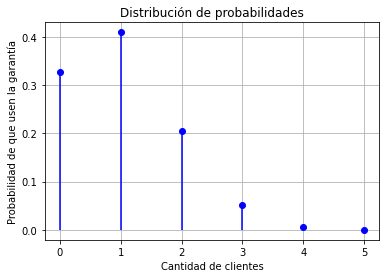

In [62]:
# Finalmente podemos graficar la función haciendo uso del módulo matplotlib.plotlib, al que llamamos con el alias de plt
fig, ax = plt.subplots(1, 1) # Creamos un lienzo para nuestro gráfic

# El gráfico está dado por:
ax.plot(x, p, 'bo') # Agregamos nuestro gráfico en forma de puntos azules con el comando 'bo' -> b: blue (azul)- o: puntos
ax.vlines(x= x, ymin= 0, ymax= p, colors='b') # Agregamos las líneas verticales desde ymin= 0 hasta ymax = p(x), de color azul

# Los demás complementos, opcionales:
ax.grid() # Agrega las grillas al gráfico
ax.set_title('Distribución de probabilidades')
ax.set_xlabel('Cantidad de clientes')
ax.set_ylabel('Probabilidad de que usen la garantía')
plt.show()